# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
lats

Number of cities in the list: 609


array([ 19.07696895,  50.02276626, -18.74877227, ...,  58.17673027,
        55.53581061,  63.15544437])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
 # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    response = requests.get(city_url).json()


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp =  response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | semey
Processing Record 3 of Set 1 | arica
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | luba
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | oranjemund
Processing Record 12 of Set 1 | bataipora
Processing Record 13 of Set 1 | chenaran
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | kaa-khem
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | woolgoolga
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | la paz
Processing Record 22 of Set 1 | bryne
P

Processing Record 42 of Set 4 | pestravka
Processing Record 43 of Set 4 | dera ghazi khan
Processing Record 44 of Set 4 | arno
Processing Record 45 of Set 4 | ukata
Processing Record 46 of Set 4 | outjo
Processing Record 47 of Set 4 | kamyzyak
Processing Record 48 of Set 4 | san andres
Processing Record 49 of Set 4 | college
Processing Record 0 of Set 5 | hayma'
City not found. Skipping...
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | haiku-pauwela
Processing Record 4 of Set 5 | rouached
Processing Record 5 of Set 5 | gulf shores
Processing Record 6 of Set 5 | kourou
Processing Record 7 of Set 5 | anjar
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | sorong
Processing Record 10 of Set 5 | balao
Processing Record 11 of Set 5 | itacare
Processing Record 12 of Set 5 | espargos
City not found. Skipping...
Processing Record 13 of Set 5 | chui
Processing Record 14 of Set 5 | hithadhoo
Processin

Processing Record 35 of Set 8 | debark'
Processing Record 36 of Set 8 | wynyard
Processing Record 37 of Set 8 | an nimas
Processing Record 38 of Set 8 | pocone
Processing Record 39 of Set 8 | saint-joseph
Processing Record 40 of Set 8 | coahuayana de hidalgo
Processing Record 41 of Set 8 | vila do maio
Processing Record 42 of Set 8 | talara
Processing Record 43 of Set 8 | mpanda
Processing Record 44 of Set 8 | bengkulu
Processing Record 45 of Set 8 | igarape
Processing Record 46 of Set 8 | murud
Processing Record 47 of Set 8 | panama city beach
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | masvingo
Processing Record 0 of Set 9 | ecublens
Processing Record 1 of Set 9 | seneca falls
Processing Record 2 of Set 9 | kailua-kona
Processing Record 3 of Set 9 | ketchikan
Processing Record 4 of Set 9 | la sarre
Processing Record 5 of Set 9 | kerikeri
Processing Record 6 of Set 9 | nikolayevsk-on-amure
Processing Record 7 of Set 9 | villa gesell
Processing Record 8 of Se

Processing Record 23 of Set 12 | novodvinsk
Processing Record 24 of Set 12 | aras-asan
Processing Record 25 of Set 12 | maintirano
Processing Record 26 of Set 12 | shelton
Processing Record 27 of Set 12 | mata-utu
Processing Record 28 of Set 12 | zag
Processing Record 29 of Set 12 | fredericton
Processing Record 30 of Set 12 | essaouira
Processing Record 31 of Set 12 | andergrove
Processing Record 32 of Set 12 | balkanabat
Processing Record 33 of Set 12 | damasak
Processing Record 34 of Set 12 | pavilosta
Processing Record 35 of Set 12 | black point
Processing Record 36 of Set 12 | alegrete
Processing Record 37 of Set 12 | twin falls
Processing Record 38 of Set 12 | pahrump
Processing Record 39 of Set 12 | lerwick
Processing Record 40 of Set 12 | port macquarie
Processing Record 41 of Set 12 | siwa oasis
Processing Record 42 of Set 12 | butner
Processing Record 43 of Set 12 | yakeshi
Processing Record 44 of Set 12 | alvaraes
Processing Record 45 of Set 12 | muravlenko
Processing Record

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)


# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bathsheba,13.2167,-59.5167,27.34,89,40,7.72,BB,1699310859
1,semey,50.4111,80.2275,-1.70,59,71,2.34,KZ,1699311325
2,arica,-18.4750,-70.3042,21.75,68,0,4.12,CL,1699311347
3,atafu village,-8.5421,-172.5159,29.02,73,49,4.37,TK,1699310772
4,cabo san lucas,22.8909,-109.9124,32.01,75,75,3.60,MX,1699311037


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bathsheba,13.2167,-59.5167,27.34,89,40,7.72,BB,1699310859
1,semey,50.4111,80.2275,-1.70,59,71,2.34,KZ,1699311325
2,arica,-18.4750,-70.3042,21.75,68,0,4.12,CL,1699311347
3,atafu village,-8.5421,-172.5159,29.02,73,49,4.37,TK,1699310772
4,cabo san lucas,22.8909,-109.9124,32.01,75,75,3.60,MX,1699311037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

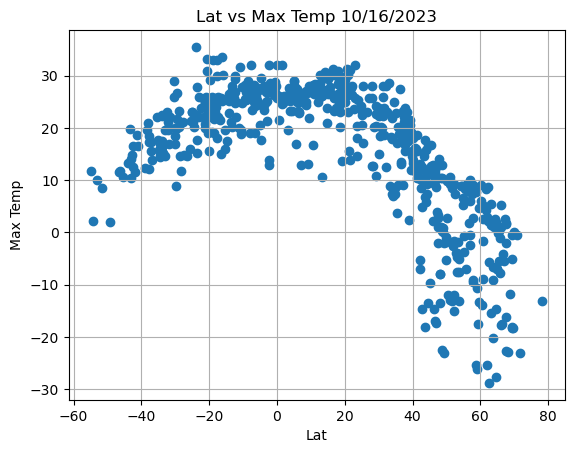

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Max Temp 10/16/2023")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

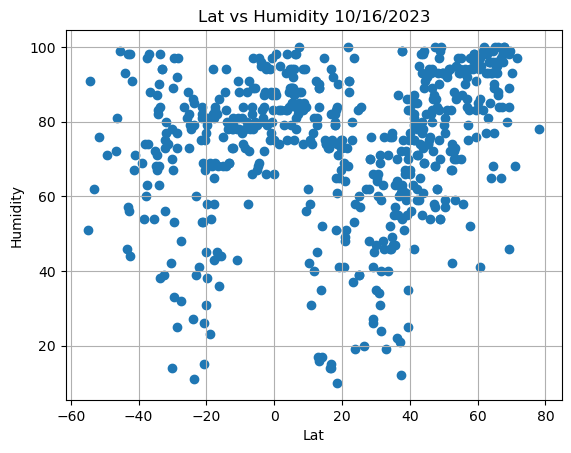

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("Lat vs Humidity 10/16/2023")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

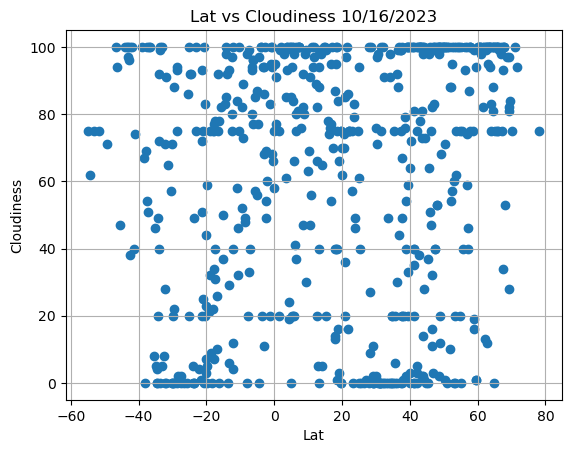

In [35]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Cloudiness 10/16/2023")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

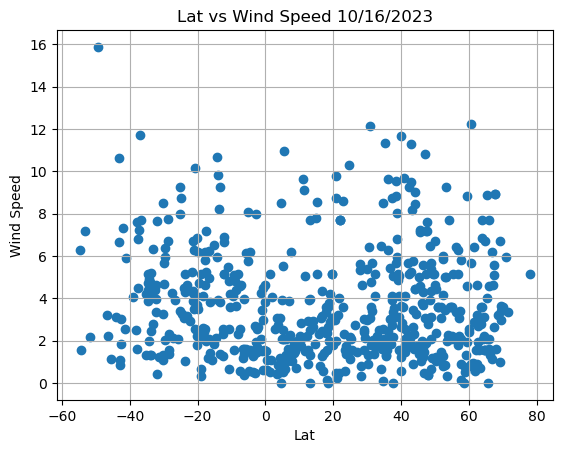

In [36]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Wind Speed 10/16/2023")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bathsheba,13.2167,-59.5167,27.34,89,40,7.72,BB,1699310859
1,semey,50.4111,80.2275,-1.70,59,71,2.34,KZ,1699311325
4,cabo san lucas,22.8909,-109.9124,32.01,75,75,3.60,MX,1699311037
5,luba,3.4568,8.5547,27.58,83,85,3.08,GQ,1699311348
7,kodiak,57.7900,-152.4072,2.73,52,75,2.06,US,1699310778


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arica,-18.4750,-70.3042,21.75,68,0,4.12,CL,1699311347
3,atafu village,-8.5421,-172.5159,29.02,73,49,4.37,TK,1699310772
6,port-aux-francais,-49.3500,70.2167,1.93,71,71,15.88,TF,1699311348
8,edinburgh of the seven seas,-37.0676,-12.3116,15.57,98,100,11.70,SH,1699310757
9,bredasdorp,-34.5322,20.0403,14.67,71,4,3.86,ZA,1699310770


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'MaxTemp')

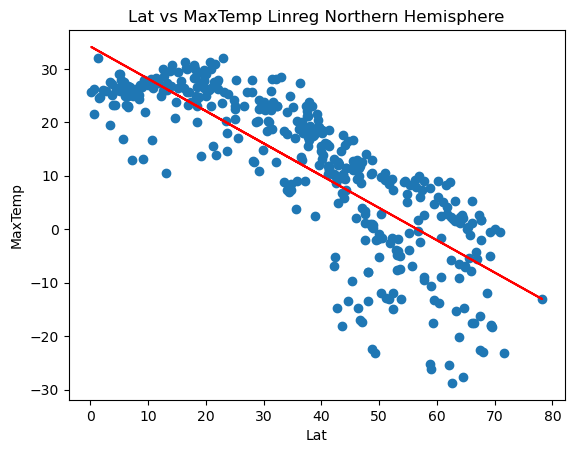

In [39]:
# Linear regression on Northern Hemisphere
model = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
y_values = northern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(northern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs MaxTemp Linreg Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("MaxTemp")
# YOUR CODE HERE

Text(0, 0.5, 'MaxTemp')

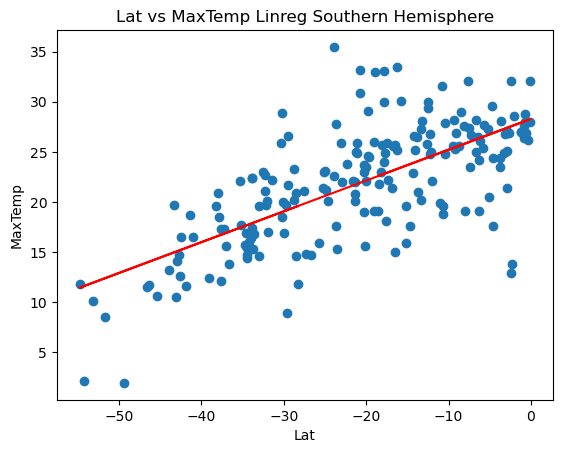

In [40]:
# Linear regression on Southern Hemisphere
model = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
y_values = southern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(southern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs MaxTemp Linreg Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("MaxTemp")
# YOUR CODE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity')

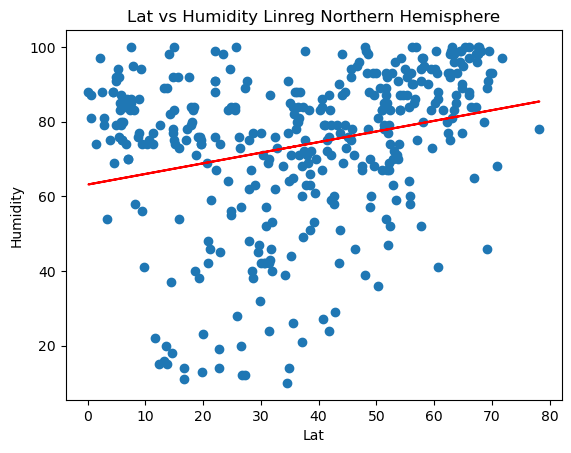

In [15]:
# Northern Hemisphere
model = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
y_values = northern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(northern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Humidity Linreg Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Humidity")

# YOUR CODE HERE

Text(0, 0.5, 'Humidity')

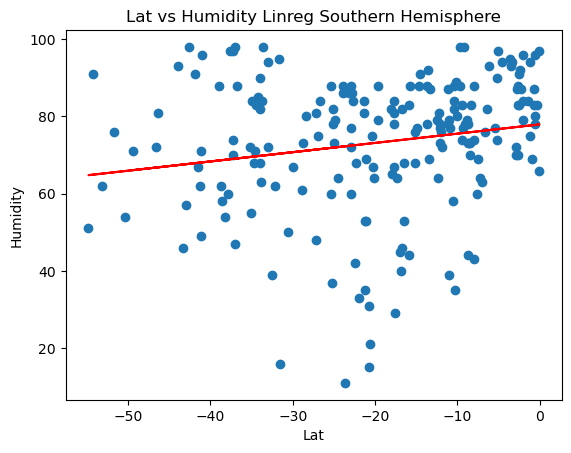

In [16]:
# Southern Hemisphere
model = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
y_values = southern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(southern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Humidity Linreg Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Humidity")
# YOUR CODE HERE

**Discussion about the linear relationship:** Weak positive correlation in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness')

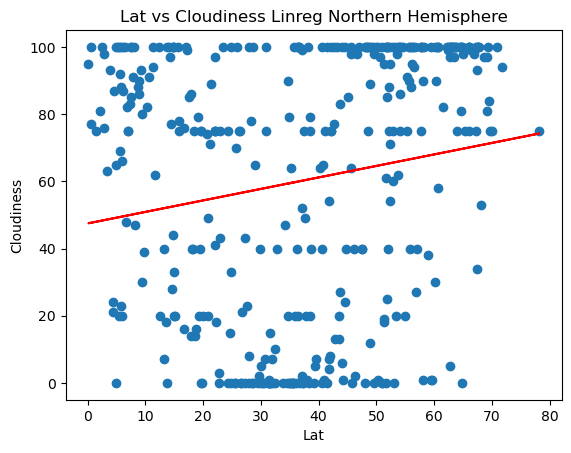

In [17]:
# Northern Hemisphere
model = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
y_values = northern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(northern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Cloudiness Linreg Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
# YOUR CODE HERE

Text(0, 0.5, 'Cloudiness')

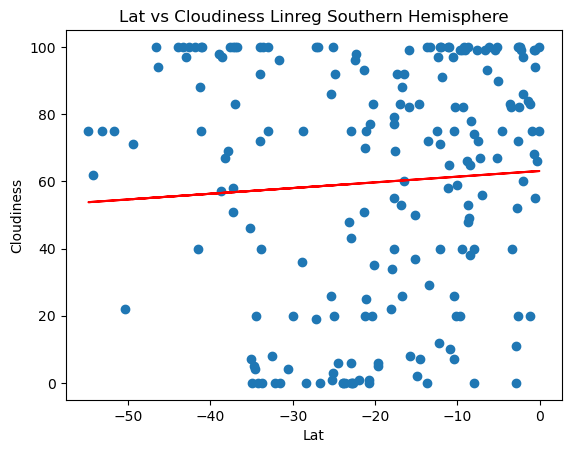

In [18]:
# Southern Hemisphere
model = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
y_values = southern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(southern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Cloudiness Linreg Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

# YOUR CODE HERE

**Discussion about the linear relationship:** Weak positive correlation between latitude and cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed')

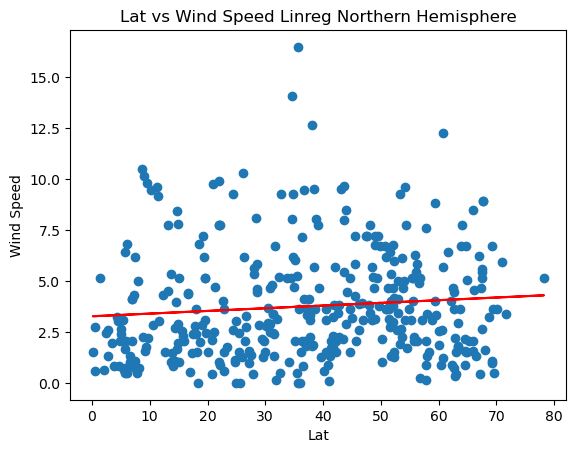

In [19]:
# Northern Hemisphere
model = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
y_values = northern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(northern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Wind Speed Linreg Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
# YOUR CODE HERE

Text(0, 0.5, 'Wind Speed')

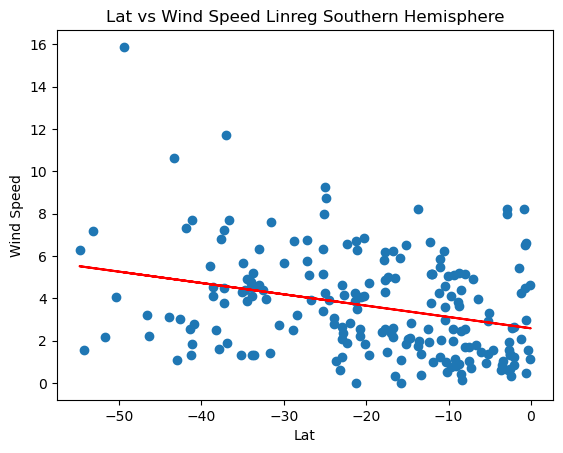

In [20]:
# Southern Hemisphere
model = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
y_values = southern_hemi_df["Lat"] * model[0] + model[1]

plt.plot(southern_hemi_df["Lat"], y_values, color="red")
plt.title("Lat vs Wind Speed Linreg Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
# YOUR CODE HERE

**Discussion about the linear relationship:** Weak negative correlation between latitude and wind speed in south hemisphere, weak positive in northeren hemisphere.